
# **Instalação de dependências**

In [198]:
pip install keras-rectified-adam keras.utils tqdm numpy pandas scikit-learn tensorflow matplotlib


# Importação de pacotes


In [199]:
import tqdm
import numpy as np
import pandas as pd
from sklearn.model_selection import LeaveOneOut
import keras
from tensorflow.keras.models import Sequential
from keras.models import Sequential, Model
from keras.layers import Dense, Input, concatenate
from keras.losses import binary_crossentropy
from keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')


In [200]:
import tensorflow as tf
import numpy as np
import random
import os

seed_value = 0

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
os.environ["PYTHONHASHSEED"] = str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# 4. Set `tensorflow` pseudo-random generator at a fixed value
tf.random.set_seed(seed_value)


# Coletar dados da tabela

In [187]:
 import pandas as pd

 # Caminho para os dados

 path = "trains_data_100_NoneChanged.csv"
 str_att = {
     "length": ["short", "long"],
     "shape": [
     "closedrect",
     "dblopnrect",
     "ellipse",
     "hexagon",
     "jaggedtop",
     "openrect",
     "opentrap",
     "slopetop",
     "ushaped",
     "dbopenrect",
     "closerect",
     "closedtrap",
     "housetoprect",
     "closedushaped",
     "ushapedhousetop",
     "dbclosedrect",
     "sloptop",
     "dbsloptop",
     "closedtraptop",
     "traptop",
     "ushape",


     ],
     "load_shape": ["circlelod",
     "hexaglod",
     "rectanglod",
     "trianglod",
     "rectanglod(short)",
     "rectanglod(medium)",
     "rectanglod(long)",
     "invtrianglod",
     "diamondlod",
     "upsidedowntri"],
     "Class_attribute": ["west", "east"],
 }

 def read_data(path=path):
     df = pd.read_csv(path, delimiter=",")  # Usando argumento nomeado 'delimiter'

     for k in df:
         for att in str_att:
             if k.startswith(att):
                 for i, val in enumerate(df[k]):
                     if val in str_att[att]:
                         df.at[i, k] = str_att[att].index(val)

     df.replace("\\0", 0, inplace=True)
     df.replace("None", -1, inplace=True)

     return df

 df = read_data()
 df


,Number_of_cars,Number_of_different_loads,num_wheels1,length1,shape1,num_loads1,load_shape1,num_wheels2,length2,shape2,...,Rectangle_next_to_triangle,Rectangle_next_to_hexagon,Rectangle_next_to_circle,Triangle_next_to_triangle,Triangle_next_to_hexagon,Triangle_next_to_circle,Hexagon_next_to_hexagon,Hexagon_next_to_circle,Circle_next_to_circle,Class_attribute
0,4,3,2,1,0,3,4,2,0,5,...,1,0,0,0,0,0,0,0,0,1
1,4,2,2,0,5,1,0,2,0,11,...,0,0,0,0,0,1,0,0,0,1
2,4,3,2,0,0,1,0,2,0,5,...,1,0,0,0,0,0,0,0,0,1
3,5,4,2,0,5,1,5,2,1,5,...,1,0,0,0,0,1,0,0,0,1
4,4,3,2,0,8,1,5,2,0,11,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5,3,2,0,9,1,3,2,0,6,...,0,0,1,1,0,1,0,0,0,0
96,3,2,2,1,10,3,4,2,0,3,...,0,0,1,0,0,0,0,0,0,0
97,3,2,3,1,10,3,4,2,0,12,...,0,0,1,0,0,0,0,0,0,0
98,3,1,2,0,5,1,3,2,0,12,...,0,0,0,1,0,0,0,0,0,0


# Questão 1:
Adapte e execute o código apenas com o modelo neuro-simbolico e
treine sua adapatação para os 100 trens assumindo que o da coluna esquerda
vão para o leste e os da esquerda para o oeste., considerando inicialmente os 11
predicados sugeridos
1. Analise se são suficientes para o caso dos 100 e se não for, adicione a
descrição lógica dos novos predicados.
2. Para treinamento:
a. Caso 1 Separe 30% dos casos, treine o modelo com 70%, e teste com
os 30% restante.
b. Faça um treinamento e teste com validação cruzada conforme figura
abaixo, e compare com o resultado de 2.(a).

**Metadata**

In [188]:
def model_2():
    # features
    t = Input(shape=(1,), name="t")
    c = Input(shape=(1,), name="c")
    w = Input(shape=(1,), name="w")
    l = Input(shape=(1,), name="l")
    s = Input(shape=(1,), name="s")
    nc = Input(shape=(1,), name="nc")
    ls = Input(shape=(1,), name="ls")
    nl = Input(shape=(1,), name="nl")
    ncl = Input(shape=(1,), name="ncl")
    x_crc = Input(shape=(1,), name="x_crc")
    x_hex = Input(shape=(1,), name="x_hex")
    x_rec = Input(shape=(1,), name="x_rec")
    x_tri = Input(shape=(1,), name="x_tri")

    # num_cars(t,nc)
    num_cars_ = concatenate([t, nc])
    num_cars_ = Dense(20, activation="relu")(num_cars_)
    num_cars = Dense(1, activation="sigmoid", name="num_cars")(num_cars_)
    num_cars = Model(inputs=[t, nc], outputs=num_cars)

    # num_loads(t,nl)
    num_loads_ = concatenate([t, nl])
    num_loads_ = Dense(20, activation="relu")(num_loads_)
    num_loads = Dense(1, activation="sigmoid", name="num_loads")(num_loads_)
    num_loads = Model(inputs=[t, nl], outputs=num_loads)

    # num_wheels(t,c,w)
    num_wheels_ = concatenate([t, c, w])
    num_wheels_ = Dense(20, activation="relu")(num_wheels_)
    num_wheels = Dense(1, activation="sigmoid", name="num_wheels")(num_wheels_)
    num_wheels = Model(inputs=[t, c, w], outputs=num_wheels)

    # length(t,c,l)
    length_ = concatenate([t, c, l])
    length_ = Dense(20, activation="relu")(length_)
    length = Dense(1, activation="sigmoid", name="length")(length_)
    length = Model(inputs=[t, c, l], outputs=length)

    # shape(t,c,s)
    shape_ = concatenate([t, c, s])
    shape_ = Dense(20, activation="relu")(shape_)
    shape = Dense(1, activation="sigmoid", name="shape")(shape_)
    shape = Model(inputs=[t, c, s], outputs=shape)

    # num_car_loads(t,c,ncl)
    num_car_loads_ = concatenate([t, c, ncl])
    num_car_loads_ = Dense(20, activation="relu")(num_car_loads_)
    num_car_loads = Dense(1, activation="sigmoid", name="num_car_loads")(num_car_loads_)
    num_car_loads = Model(inputs=[t, c, ncl], outputs=num_car_loads)

    # load_shape(t,c,ls)
    load_shape_ = concatenate([t, c, ls])
    load_shape_ = Dense(20, activation="relu")(load_shape_)
    load_shape = Dense(1, activation="sigmoid", name="load_shape")(load_shape_)
    load_shape = Model(inputs=[t, c, ls], outputs=load_shape)

    # next_crc(t,c,x)
    next_crc_ = concatenate([t, c, x_crc])
    next_crc_ = Dense(20, activation="relu")(next_crc_)
    next_crc = Dense(1, activation="sigmoid", name="next_crc")(next_crc_)
    next_crc = Model(inputs=[t, c, x_crc], outputs=next_crc)

    # next_hex_(t,c,x)
    next_hex_ = concatenate([t, c, x_hex])
    next_hex_ = Dense(20, activation="relu")(next_hex_)
    next_hex = Dense(1, activation="sigmoid", name="next_hex")(next_hex_)
    next_hex = Model(inputs=[t, c, x_hex], outputs=next_hex)

    # next_rec(t,c,x)
    next_rec_ = concatenate([t, c, x_rec])
    next_rec_ = Dense(20, activation="relu")(next_rec_)
    next_rec = Dense(1, activation="sigmoid", name="next_rec")(next_rec_)
    next_rec = Model(inputs=[t, c, x_rec], outputs=next_rec)

    # next_tri(t,c,x)
    next_tri_ = concatenate([t, c, x_tri])
    next_tri_ = Dense(20, activation="relu")(next_tri_)
    next_tri = Dense(1, activation="sigmoid", name="next_tri")(next_tri_)
    next_tri = Model(inputs=[t, c, x_tri], outputs=next_tri)

    # east
    east = concatenate(
        [
            num_cars_,
            num_loads_,
            num_wheels_,
            length_,
            shape_,
            num_car_loads_,
            load_shape_,
            next_crc_,
            next_hex_,
            next_rec_,
            next_tri_,
        ]
    )
    east = Dense(3, activation="relu")(east)
    east = Dense(1, activation="sigmoid", name="east")(east)
    east = Model(
        inputs=[t, c, w, l, s, nc, ls, nl, ncl, x_crc, x_hex, x_rec, x_tri],
        outputs=east,
    )

    # metanet
    metanet = Model(
        inputs=east.inputs,
        outputs=[
            num_cars.output,
            num_loads.output,
            num_wheels.output,
            length.output,
            shape.output,
            num_car_loads.output,
            load_shape.output,
            next_crc.output,
            next_hex.output,
            next_rec.output,
            next_tri.output,
            east.output,
        ],
    )

    # rules
    rules = {
        "num_cars": num_cars,
        "num_loads": num_loads,
        "num_wheels": num_wheels,
        "length": length,
        "shape": shape,
        "num_car_loads": num_car_loads,
        "load_shape": load_shape,
        "next_crc": next_crc,
        "next_hex": next_hex,
        "next_rec": next_rec,
        "next_tri": next_tri,
    }

    return metanet, east, rules


metanet, east, rules = model_2()
metanet.summary()


Model: "functional_558"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ t (InputLayer)            │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ nc (InputLayer)           │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ nl (InputLayer)           │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ c (InputLayer)            │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ w (InputLayer)            │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ l (InputLayer)            │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ s (InputLayer)            │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ ncl (InputLayer)          │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ ls (InputLayer)           │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ x_crc (InputLayer)        │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ x_hex (InputLayer)        │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ x_rec (InputLayer)        │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ x_tri (InputLayer)        │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_504           │ (None, 2)              │              0 │ t[0][0], nc[0][0]      │
│ (Concatenate)             │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_505           │ (None, 2)              │              0 │ t[0][0], nl[0][0]      │
│ (Concatenate)             │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_506           │ (None, 3)              │              0 │ t[0][0], c[0][0],      │
│ (Concatenate)             │                        │                │ w[0][0]                │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_507           │ (None, 3)              │              0 │ t[0][0], c[0][0],      │
│ (Concatenate)             │                        │                │ l[0][0]                │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_508      

 Total params: 1,738 (6.79 KB)

 Trainable params: 1,738 (6.79 KB)

 Non-trainable params: 0 (0.00 B)

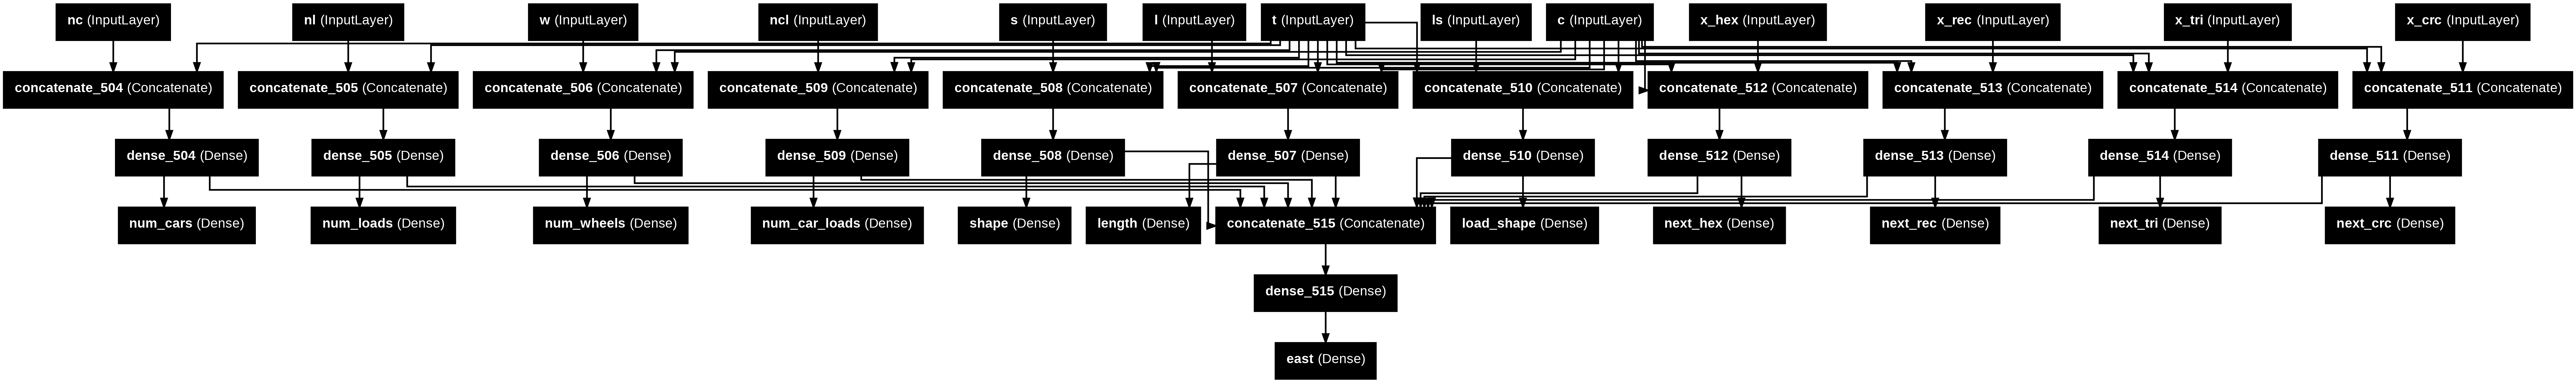

In [189]:
plot_model(metanet, show_shapes=False, show_layer_names=True)

**Data argumentation**

In [190]:
df = read_data()
cols = [
    [
        c
        for c in df.columns
        if not (str.isdigit(c[-1])) or (str.isdigit(c[-1]) and int(c[-1]) == n)
    ]
    for n in range(1, 5)
]

data = [df[col] for col in cols]
for c, df in enumerate(data):
    df.columns = [
        name if not str.isdigit(name[-1]) else name[:-1] for name in df.columns
    ]
    df["car"] = c + 1

data = pd.concat(data)
data.reset_index(level=0, inplace=True)
data["train"] = data.pop("index")
data.T[0]


Rows with NaN values:
    Number_of_cars  Number_of_different_loads  num_wheels1  length1  shape1  \
1               4                          3            2        0       8   
2               4                          2            2        0       5   
4               4                          3            2        0       1   
5               3                          2            2        1       0   
6               4                          2            2        0       1   
7               3                          2            3        1       0   
9               3                          1            2        0       8   

   num_loads1  load_shape1  num_wheels2  length2  shape2  ...  \
1           1            3            2        0       6  ...   
2           1            0            2        0       3  ...   
4           1            3            3        1       0  ...   
5           3            0            2        0       5  ...   
6           1            0 

# (a) Caso 1 Separe 30% dos casos, treine o modelo com 70%, e teste com os 30% restante.

**Separação de dados**

In [191]:
def sort_inputs(X):
    t = X["train"].T
    c = X["car"].T
    w = X["num_wheels"].T
    l = X["length"].T
    s = X["shape"].T
    nc = X["Number_of_cars"].T
    ls = X["load_shape"].T
    nl = X["Number_of_different_loads"].T
    ncl = X["num_loads"].T
    x_crc = np.sum(X[[col for col in X if col.endswith("circle")]], axis=1).T
    x_hex = np.sum(X[[col for col in X if col.endswith("hexagon")]], axis=1).T
    x_rec = np.sum(X[[col for col in X if col.endswith("rectangle")]], axis=1).T
    x_tri = np.sum(X[[col for col in X if col.endswith("triangle")]], axis=1).T

    return [t, c, w, l, s, nc, ls, nl, ncl, x_crc, x_hex, x_rec, x_tri]

# Separar os dados em treino e teste
def split_data(data, test_size=0.3):
    X = data.drop(columns=["Class_attribute"])
    y = data["Class_attribute"]

    # Dividir os dados
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed_value)

    # Organizar os inputs para o modelo
    x_train = sort_inputs(X_train)
    x_test = sort_inputs(X_test)

    return x_train, x_test, np.array(y_train), np.array(y_test)


In [192]:
data.columns

Index(['Number_of_cars', 'Number_of_different_loads', 'num_wheels', 'length',
       'shape', 'num_loads', 'load_shape', 'Rectangle_next_to_rectangle',
       'Rectangle_next_to_triangle', 'Rectangle_next_to_hexagon',
       'Rectangle_next_to_circle', 'Triangle_next_to_triangle',
       'Triangle_next_to_hexagon', 'Triangle_next_to_circle',
       'Hexagon_next_to_hexagon', 'Hexagon_next_to_circle',
       'Circle_next_to_circle', 'Class_attribute', 'car', 'train'],
      dtype='object')

**Treino**

In [193]:
from sklearn.model_selection import train_test_split

hists = dict()
question_2_names = [
    "Output of network",
    "Desired output",
    "Class",
]
question_2 = {name: [] for name in question_2_names}

# Dividir dados e treinar o modelo
x_train, x_test, y_train, y_test = split_data(data)

metanet, east, rules = model_2()

x_train = [np.asarray(x).astype(int) for x in x_train]
y_train = np.asarray(y_train).astype(int)
x_test = [np.asarray(x).astype(int) for x in x_test]
y_test = np.asarray(y_test).astype(int)

east.compile(
    loss=binary_crossentropy, optimizer=Adam(), metrics=["mse", "binary_accuracy"]
)
hist = east.fit(
    x_train,
    y_train,
    validation_data=[x_test, y_test],
    epochs=1000,
    verbose=0,
)


# Armazenar o histórico de treinamento
hists["train_test_split"] = hist

# Coletar resultados
question_2["Output of network"].append(east.predict(x_test)[0][0])
question_2["Desired output"].append(y_test[0])
question_2["Class"].append(str_att["Class_attribute"][int(y_test[0])])

1/4 ━━━━━━━━━━━━━━━━━━━━ 1s 404ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step


**Plotar gráficos**

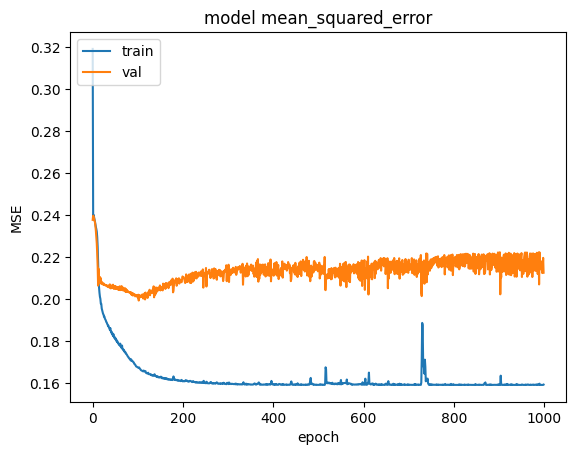

In [194]:
for i, history in enumerate(hists.values()):
    plt.plot(history.history['mse'], c='tab:blue')
    plt.plot(history.history['val_mse'], c='tab:orange')

plt.title('model mean_squared_error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

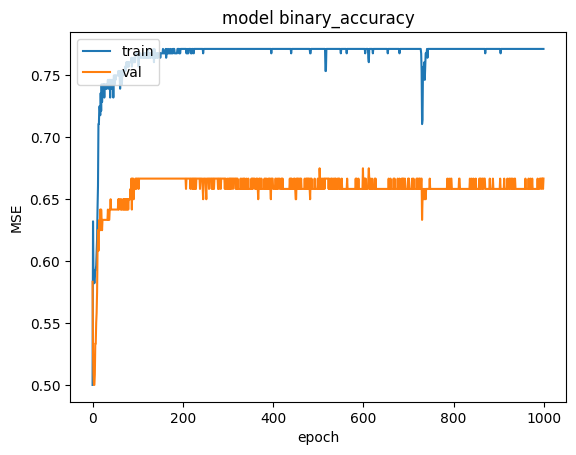

In [195]:
for i, history in enumerate(hists.values()):
    plt.plot(history.history['binary_accuracy'], c='tab:blue')
    plt.plot(history.history['val_binary_accuracy'], c='tab:orange')

plt.title('model binary_accuracy')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


**Coletar de dados e precisão do modelo**

In [197]:
# Coletar resultados
question_2["Output of network"].append(east.predict(x_test)[0][0])
question_2["Desired output"].append(y_test[0])
question_2["Class"].append(str_att["Class_attribute"][int(y_test[0])])

# Criar DataFrame para armazenar os resultados
t2 = pd.DataFrame.from_dict(question_2).round(2)

# Adicionar a precisão final do modelo ao DataFrame
t2["Cars Accuracy"] = [hist.history["binary_accuracy"][-1]] * len(t2)  # Repetir o valor para cada linha

t2 = t2.reindex(
    columns=[
        "Cars Accuracy",
        "Output of network",
        "Desired output",
        "Class",
    ]
)

print(t2)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
   Cars Accuracy  Output of flat network  Desired output Class
0       0.771429                    0.31               0  west
1       0.771429                    0.31               0  west
2       0.771429                    0.31               0  west


# (b) Faça um treinamento e teste com validação cruzada conforme figura abaixo, e compare com o resultado de 2.(a).

**Separação de dados**

In [201]:
def sort_inputs(X):
    t = X["train"].T
    c = X["car"].T
    w = X["num_wheels"].T
    l = X["length"].T
    s = X["shape"].T
    nc = X["Number_of_cars"].T
    ls = X["load_shape"].T
    nl = X["Number_of_different_loads"].T
    ncl = X["num_loads"].T
    x_crc = np.sum(X[[col for col in X if col.endswith("circle")]], axis=1).T
    x_hex = np.sum(X[[col for col in X if col.endswith("hexagon")]], axis=1).T
    x_rec = np.sum(X[[col for col in X if col.endswith("rectangle")]], axis=1).T
    x_tri = np.sum(X[[col for col in X if col.endswith("triangle")]], axis=1).T

    return [t, c, w, l, s, nc, ls, nl, ncl, x_crc, x_hex, x_rec, x_tri]


def split(data, val_train):
    x_train = data.query(f"train != {val_train}")
    x_test = data.query(f"train == {val_train}")
    y_train = np.array(x_train.pop("Class_attribute"))
    y_test = np.array(x_test.pop("Class_attribute"))
    x_train = sort_inputs(x_train)
    x_test = sort_inputs(x_test)

    return x_train, x_test, y_train, y_test


**Treino**

In [202]:
hists = dict()
question_2_names = [
    "Train",
    "Output of network",
    "Desired output",
    "Class",
]
question_2 = {name: [] for name in question_2_names}

for validation_i in tqdm.tqdm(range(0, 10)):
    x_train, x_test, y_train, y_test = split(data, validation_i)
    metanet, east, rules = model_2()

    x_train = [np.asarray(x).astype(int) for x in x_train]
    y_train = np.asarray(y_train).astype(int)
    x_test = [np.asarray(x).astype(int) for x in x_test]
    y_test = np.asarray(y_test).astype(int)

    east.compile(
        loss=binary_crossentropy, optimizer=Adam(), metrics=["mse", "binary_accuracy"]
    )
    hist = east.fit(
        x_train,
        y_train,
        validation_data=[x_test, y_test],
        epochs=1000,
        verbose=0,
    )
    hists[validation_i] = hist

    question_2["Train"].append(validation_i)
    question_2["Output of network"].append(east.predict(x_test)[0][0])
    question_2["Desired output"].append(y_test[0])
    question_2["Class"].append(str_att["Class_attribute"][int(y_test[0])])


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 10%|█         | 1/10 [03:01<27:16, 181.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 20%|██        | 2/10 [05:53<23:27, 175.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 30%|███       | 3/10 [08:37<19:54, 170.63s/it]WARNING:tensorflow:5 out of the last 13 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7e6cbb87b640> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 40%|████      | 4/10 [11:16<16:35, 165.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 50%|█████     | 5/10 [13:58<13:42, 164.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 60%|██████    | 6/10 [16:41<10:55, 163.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 70%|███████   | 7/10 [19:25<08:11, 163.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 80%|████████  | 8/10 [22:06<05:26, 163.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 90%|█████████ | 9/10 [24:45<02:41, 161.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


100%|██████████| 10/10 [27:26<00:00, 164.65s/it]


**Plotar gráficos**

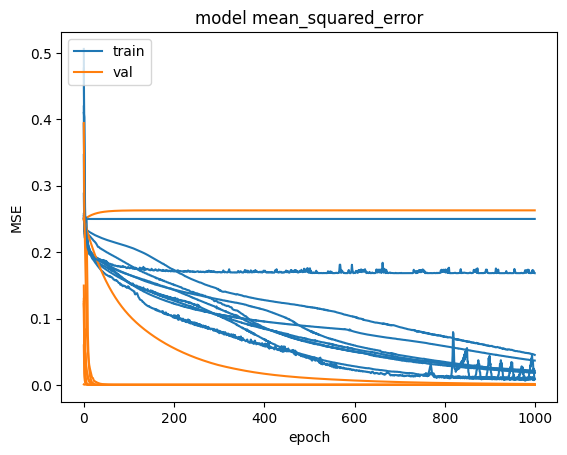

In [203]:
for i, history in enumerate(hists.values()):
    plt.plot(history.history['mse'], c='tab:blue')
    plt.plot(history.history['val_mse'], c='tab:orange')

plt.title('model mean_squared_error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


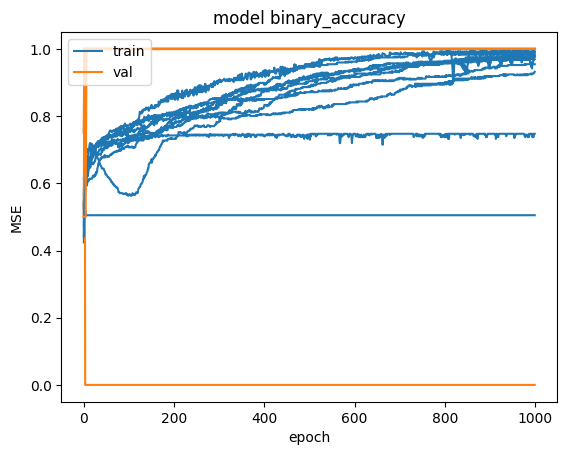

In [204]:
for i, history in enumerate(hists.values()):
    plt.plot(history.history['binary_accuracy'], c='tab:blue')
    plt.plot(history.history['val_binary_accuracy'], c='tab:orange')

plt.title('model binary_accuracy')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


**Coletar de dados e precisão do modelo**

In [211]:
t2 = pd.DataFrame.from_dict(question_2).round(2)
t2["Cars Accuracy"] = [hists[i].history["binary_accuracy"][-1] for i in range(0, 10)]
t2 = t2.reindex(
    columns=[
        "Train",
        "Cars Accuracy",
        "Output of network",
        "Desired output",
        "Class",
    ]
)
t2


,Train,Cars Accuracy,Output of flat network,Desired output,Class
0,0,0.979798,1.00,1,east
1,1,0.977273,1.00,1,east
2,2,0.977273,1.00,1,east
3,3,0.992424,1.00,1,east
4,4,0.969697,1.00,1,east
5,5,0.747475,1.00,1,east
6,6,0.505050,0.49,1,east
7,7,0.989899,1.00,1,east
8,8,0.931818,0.96,1,east
9,9,0.954545,1.00,1,east
